# Jiuzhang KNN Project Assignment
### Kaggle Digit Recognizer

https://www.kaggle.com/c/digit-recognizer

### Input Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Read tran.csv and test.csv as numpy arrays

In [2]:
data_dir = "input/"
train = pd.read_csv(data_dir + "train.csv")

In [3]:
train_row = 3000
X_train = train.values[0:train_row,1:]
y_train = train.values[0:train_row,0]
Pred_test = pd.read_csv(data_dir + "test.csv").values
print('X train', X_train.shape)
print('y train', X_train.shape)
print('Pred_test', X_train.shape)

X train (3000, 784)
y train (3000, 784)
Pred_test (3000, 784)


### Visualize Data

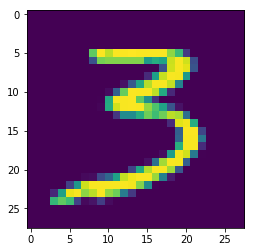

In [4]:
row = 25
plt.imshow(X_train[row].reshape((28,28)))
plt.show()

### Train test split

In [5]:
from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train_split.shape,  X_test_split.shape)

(2400, 784) (600, 784)


In [6]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,10)
scores = []
y_prediction = []
for k in k_range:
    print('value of k:', k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_split, y_train_split)
    y_pred = knn.predict(X_test_split)
    y_prediction.append(y_pred)
    accuracy = accuracy_score(y_test_split, y_pred)
    scores.append(accuracy)
    print('accuracy:', accuracy)    
    print(confusion_matrix(y_test_split,y_pred))    

value of k: 1
accuracy: 0.915
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 0  2 60  4  0  0  2  1  0  1]
 [ 0  0  1 48  0  0  0  2  1  1]
 [ 0  0  0  0 52  0  2  0  0  6]
 [ 0  1  0  2  0 46  0  0  1  1]
 [ 0  0  0  0  0  0 70  0  1  0]
 [ 0  3  0  0  1  0  0 48  0  1]
 [ 1  1  0  2  0  1  0  1 51  3]
 [ 1  0  0  0  3  0  0  3  1 44]]
value of k: 2
accuracy: 0.9133333333333333
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 0  3 63  2  1  0  0  1  0  0]
 [ 0  0  1 51  0  0  0  1  0  0]
 [ 0  0  0  0 58  0  1  0  0  1]
 [ 0  2  0  5  0 44  0  0  0  0]
 [ 3  0  0  0  0  2 66  0  0  0]
 [ 0  3  0  0  1  0  0 48  0  1]
 [ 1  2  1  2  0  4  0  2 46  2]
 [ 1  0  0  0  5  0  0  3  1 42]]
value of k: 3
accuracy: 0.9216666666666666
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 1  3 63  2  0  0  0  1  0  0]
 [ 0  0  2 49  0  1  0  1  0  0]
 [ 0  0  0  0 55  0  2  0  0  3]
 [ 0  2  0  0  0 48  0  0  0  1]
 [ 2  0  0  0  0  1 68  

### Find the best accuracy with value of K

[0.915, 0.9133333333333333, 0.9216666666666666, 0.92, 0.9166666666666666, 0.8966666666666666, 0.9033333333333333, 0.8983333333333333, 0.9016666666666666]


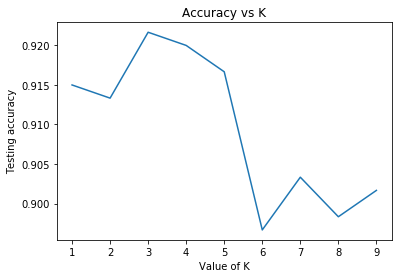

In [7]:
print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.title('Accuracy vs K')
plt.show()

### Out of Sample Prediction 


In [8]:
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_pred = knn.predict(Pred_test[:300])
# change this line to y_pred = knn.predict(Origin_X_test) for full test

### Verify Prediction Results

1


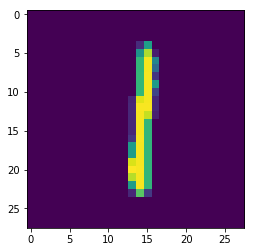

In [9]:
print (y_pred[200])
plt.imshow(Pred_test[200].reshape((28, 28)))
plt.show()

### Save down submissoin files

* ImageId	Label
* 1	2
* 2	0
* 3	9
* 4	9

In [10]:
print(len(y_pred))

# save submission to csv
pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recogniser_Result.csv', index=False,header=True)

300
